## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
tumor_animal_study_raw = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')

# Display the data table for preview
tumor_animal_study_raw.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [212]:
# Checking the number of mice.
number_of_mice = mouse_metadata['Mouse ID'].count()
number_of_mice

249

In [258]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Please see below
tumor_animal_study_raw.count()
tumor_animal_study_raw.to_csv("study.csv")

In [217]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_rows = tumor_animal_study_raw.duplicated(subset=['Mouse ID','Timepoint'])
tumor_animal_study_raw[dup_rows]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [218]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tumor_animal_study = tumor_animal_study_raw.drop_duplicates(subset=['Mouse ID','Timepoint'])
tumor_animal_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [219]:
# Checking the number of mice in the clean DataFrame.
print(len(tumor_animal_study['Mouse ID'].unique()))

249


## Summary Statistics

In [220]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_mean = tumor_animal_study.groupby(['Drug Regimen']).mean()
print(tumor_vol_mean.columns)
tumor_median = tumor_animal_study.groupby(['Drug Regimen']).median()
tumor_std_dev = tumor_animal_study.groupby(['Drug Regimen']).std()
tumor_variance = tumor_animal_study.groupby(['Drug Regimen']).var()
tumor_sem = tumor_animal_study.groupby(['Drug Regimen']).sem()
tumor_study_stats = pd.DataFrame({'Mean': tumor_vol_mean['Tumor Volume (mm3)'],
                                 'Median':tumor_median['Tumor Volume (mm3)'],
                                 'Std Dev.':tumor_std_dev['Tumor Volume (mm3)'],
                                 'Variance':tumor_variance['Tumor Volume (mm3)'],
                                 'SEM':tumor_sem['Tumor Volume (mm3)']})
print(tumor_study_stats)

Index(['Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')
                   Mean     Median  Std Dev.   Variance       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin      52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol     52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril      55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol      54.331565  52.509285  8.134708  66.173479  0.596466
Placebo       54.033581  52.288934  7.821003  61.168083  0.581331
Propriva      52.393463  50.909965  6.568014  43.138803  0.525862
Ramicane      40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn      54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol     53.236507  51.818479  6.966589  48.533355  0.516398


In [221]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_study_stats_agg = tumor_animal_study.groupby(['Drug Regimen']).agg( {'Tumor Volume (mm3)'
                                                                           :['mean','median','std','var','sem']})
tumor_study_stats_agg

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.393463  50.909965  6.568014  43.138803  0.525862
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

In [222]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using Pandas Plot.
unique_mice_count = tumor_animal_study['Drug Regimen'].value_counts()

Text(0,0.5,'Mice')

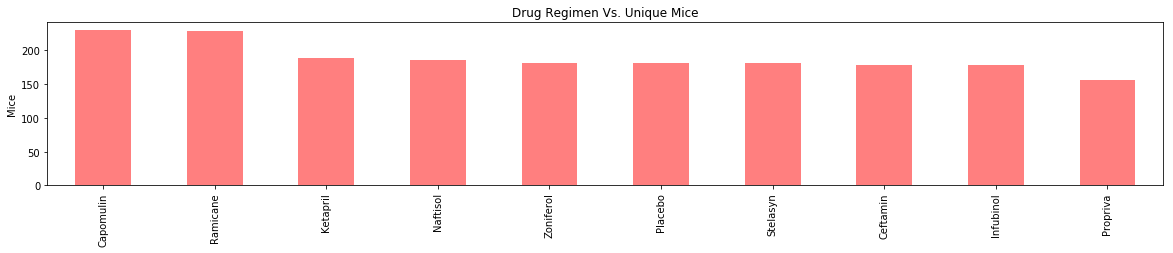

In [223]:
unique_mice_count.plot(kind='bar',facecolor='red',title='Drug Regimen Vs. Unique Mice',figsize=(20,3),alpha=0.5)
plt.ylabel("Mice")

([<matplotlib.axis.XTick at 0x7f8ca57ac048>,
 <a list of 10 Text xticklabel objects>)

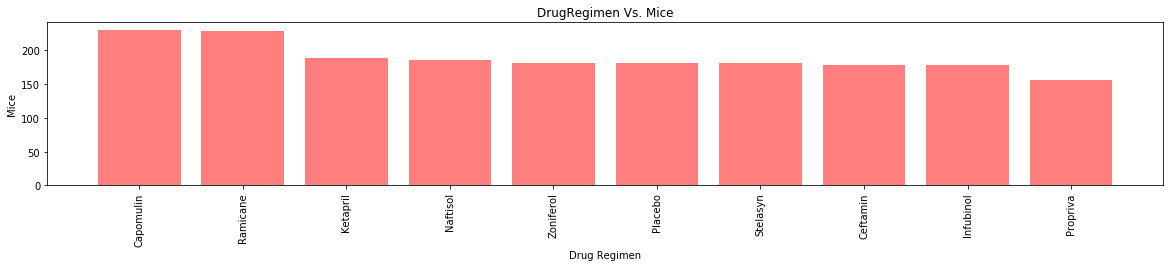

In [224]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using PyPlot.
unique_mice_count_plt = unique_mice_count.reset_index()
x_axis = np.arange(len(unique_mice_count_plt))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(20,3))
plt.title("DrugRegimen Vs. Mice")
plt.ylabel("Mice")
plt.xlabel("Drug Regimen")
plt.bar(x_axis, unique_mice_count_plt['Drug Regimen'], color='r',alpha=0.5, align="center")
plt.xticks(tick_locations,unique_mice_count_plt['index'], rotation="vertical")

(-1.1053783437113598,
 1.100256111605303,
 -1.103265408136953,
 1.1062425414441643)

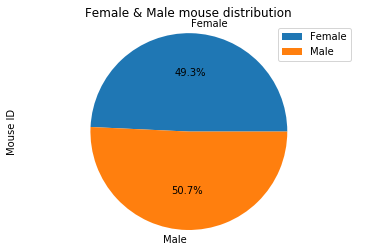

In [225]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

study_by_sex = tumor_animal_study.groupby('Sex')
count_study_by_sex = study_by_sex.count() 
count_study_by_sex.plot(kind="pie", y='Mouse ID', title=("Female & Male mouse distribution"),autopct="%1.1f%%")
plt.axis("equal")

(-1.1053783437113598,
 1.100256111605303,
 -1.103265408136953,
 1.1062425414441643)

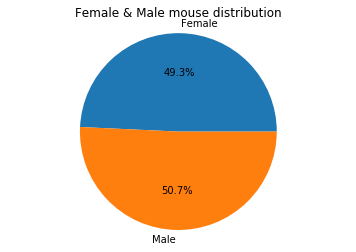

In [226]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plt = count_study_by_sex.reset_index()
plt.pie(gender_plt['Mouse ID'],labels=gender_plt['Sex'],autopct="%1.1f%%")
plt.title("Female & Male mouse distribution")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [295]:
tumor_animal_study.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [301]:
tumorvol = tumor_animal_study.loc[tumor_animal_study.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].idxmax()]
tumorvol = tumorvol.loc[tumorvol['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
tumorvol = tumorvol.reset_index(drop=True)
tumorvol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [303]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_animal_study_drop_cols = tumor_animal_study.drop(columns=['Age_months','Sex','Weight (g)', 'Metastatic Sites'])
Capomulin = (tumor_animal_study_drop_cols.loc[tumor_animal_study['Drug Regimen'] == 'Capomulin'])
#Capomulin = Capomulin.drop(columns=['Drug Regimen'])
Capomulin_tumor_vol = Capomulin.loc[Capomulin.groupby('Mouse ID').Timepoint.idxmax()]

Ramicane = tumor_animal_study.loc[tumor_animal_study['Drug Regimen'] == 'Ramicane']
Ramicane_vol = Ramicane.loc[Ramicane.groupby('Mouse ID')['Timepoint'].idxmax()]
Ramicane_vol

Infubinol = tumor_animal_study.loc[tumor_animal_study['Drug Regimen'] == 'Infubinol']
Infubinol_vol = Infubinol.groupby('Mouse ID').Timepoint.idxmax()
Ceftamin = tumor_animal_study.loc[tumor_animal_study['Drug Regimen'] == 'Ceftamin']
Ceftamin_vol = Ceftamin.groupby('Mouse ID').Timepoint.idxmax()

#could do the above way and join into a dataframe instead I decided to setit up this way
tumorvol = tumor_animal_study.loc[tumor_animal_study.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].idxmax()]
tumorvol = tumorvol.loc[tumorvol['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
tumorvol = tumorvol.reset_index(drop=True)
tumorvol.head(10)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [311]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumorvol['Drug Regimen'].unique()
treatments
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
tumor_vol_data_list = tumorvol['Tumor Volume (mm3)'].to_list()
tumor_vol_data_list
type(tumor_vol_data_list)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'Series' object has no attribute 'to_list'

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
